1 Загружаем файл

In [56]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankitverma2010/ecommerce-customer-churn-analysis-and-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ecommerce-customer-churn-analysis-and-prediction' dataset.
Path to dataset files: /kaggle/input/ecommerce-customer-churn-analysis-and-prediction


In [57]:
import os
os.listdir(path)

['E Commerce Dataset.xlsx']

In [58]:
excel_path = os.path.join(path, "E Commerce Dataset.xlsx")
xl = pd.ExcelFile(excel_path)
print("Листы в файле:")
for i, sheet in enumerate(xl.sheet_names):
    print(f"{i+1}. {sheet}")

Листы в файле:
1. Data Dict
2. E Comm


2 Базовый анализ

In [59]:
import pandas as pd

df = pd.read_excel(excel_path, sheet_name='E Comm')
print(f"Строк:\n{df.shape[0]}, Столбцов: {df.shape[1]}")
print(f"Столбцы:\n{df.columns.tolist()}")
print(f"Первые 5 строк:\n{df.head()}")
print(f"Информация о данных:\n{df.info()}")
print(f"Пропуски:\n{df.isnull().sum()}")

Строк:
5630, Столбцов: 20
Столбцы:
['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Первые 5 строк:
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female      

3 EDA

Пропуски:
Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

Churn: {0: 4682, 1: 948}


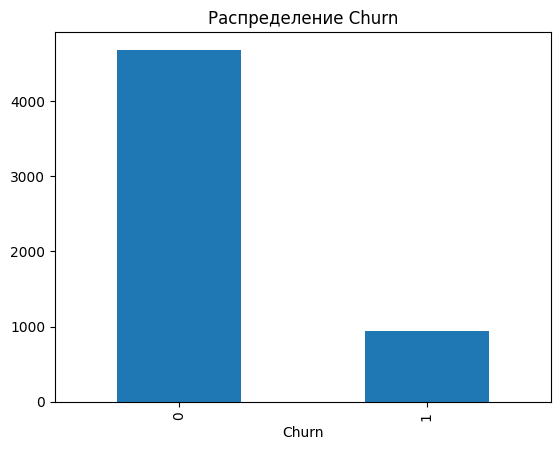

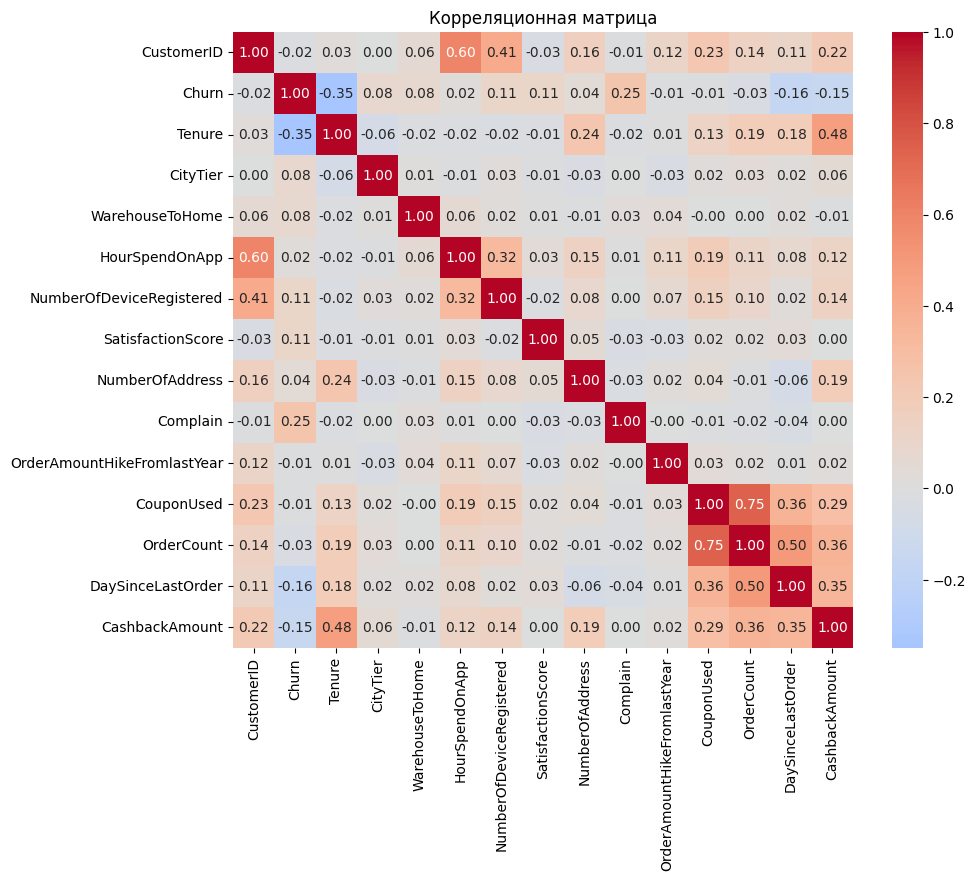


Топ-5 признаков по корреляции с Churn:
Churn                       1.000000
Tenure                     -0.349408
Complain                    0.250188
DaySinceLastOrder          -0.160757
CashbackAmount             -0.154118
NumberOfDeviceRegistered    0.107939
Name: Churn, dtype: float64


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Пропуски:")
print(df.isnull().sum()[df.isnull().sum() > 0])

print(f"\nChurn: {df['Churn'].value_counts().to_dict()}")
df['Churn'].value_counts().plot(kind='bar')
plt.title('Распределение Churn')
plt.show()

numeric = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

corr_with_churn = corr_matrix['Churn'].sort_values(key=abs, ascending=False)
print("\nТоп-5 признаков по корреляции с Churn:")
print(corr_with_churn.head(6))

4 Предобработка

In [61]:
print("Заполнение пропусков")
df = df.fillna(df.median(numeric_only=True))

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes

if 'Tenure' in df.columns and 'OrderCount' in df.columns:
    df['CustomerLoyalty'] = df['Tenure'] * df['OrderCount']
    print("Создан признак: CustomerLoyalty")

print(f"\nПосле обработки:")
print(f"Пропуски: {df.isnull().sum().sum()}")
print(f"Размер: {df.shape}")

Заполнение пропусков
Создан признак: CustomerLoyalty

После обработки:
Пропуски: 0
Размер: (5630, 21)


5 Сохранить обработанные данные в data/processed/

In [62]:
from google.colab import drive
drive.mount('/content/drive')

drive_path = '/content/drive/MyDrive/Atestat-3'
os.makedirs(drive_path, exist_ok=True)
os.makedirs(f'{drive_path}/data/processed', exist_ok=True)

output_path = f'{drive_path}/data/processed/ecommerce_churn_processed.csv'
df.to_csv(output_path, index=False, sep=';')
print(f"Данные сохранены в Google Drive: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Данные сохранены в Google Drive: /content/drive/MyDrive/Atestat-3/data/processed/ecommerce_churn_processed.csv
